**Level 2**
**Task 4: Loan Approval Prediction Description**

Description:


*   Dataset (Recommended): Loan-Approval-Prediction-Dataset (Kaggle).
*   BBuild a model to predict whether a loan application will be approved.
*   Handle missing values and encode categorical features.
*   Train a classification model and evaluate performance on imbalanced data.
*   Focus on precision, recall, and F1-score.






Tools & Libraries:


*   Python
*   Pandas
*   Scikit-Learn


Covered Topics:


*   Binary classification
*   Imbalanced data






Bonus:


*   Use SMOTE or other techniques to address class imbalance.
*   Try logistic regression vs. decision tree.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/loan_approval_dataset.csv')

Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


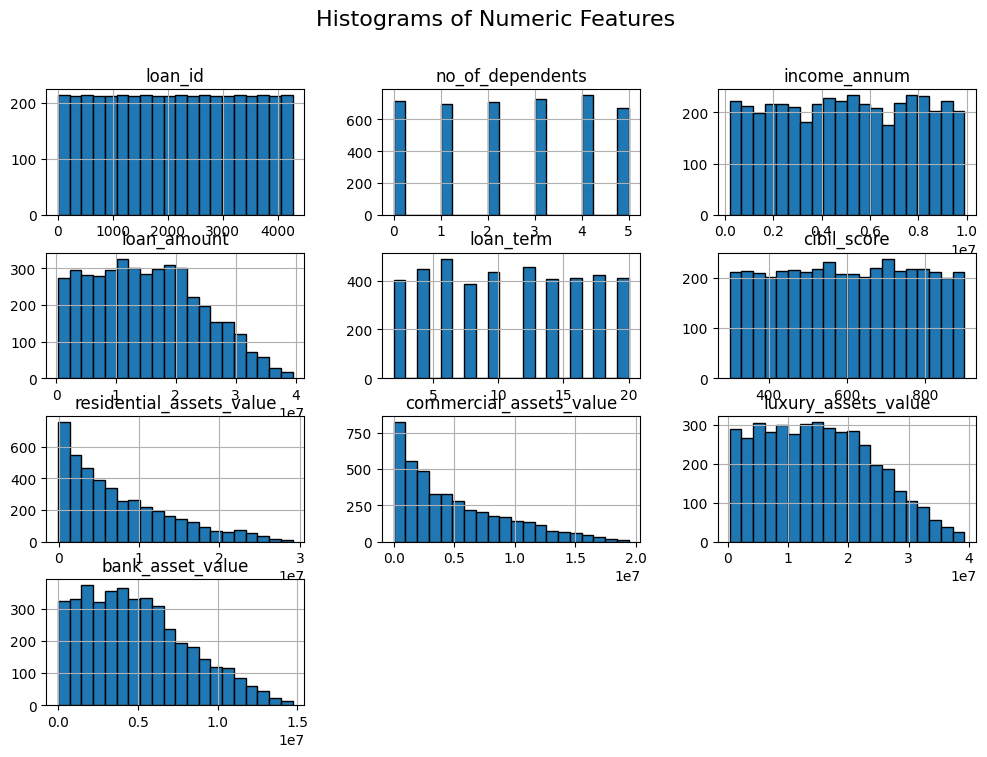

In [ ]:
data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

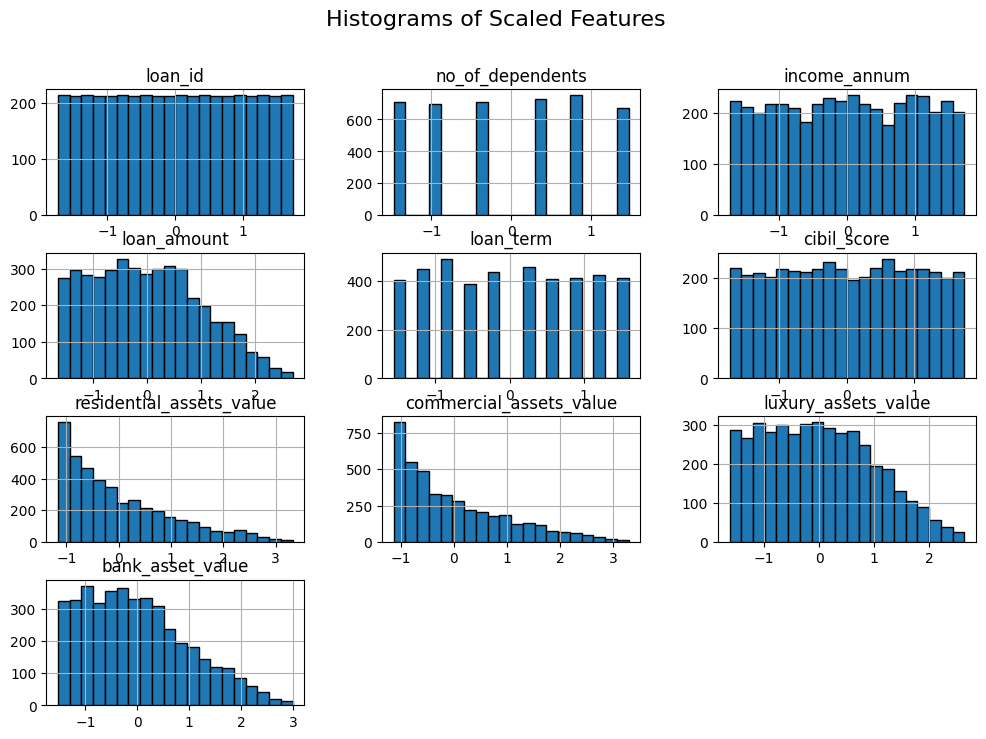

In [ ]:
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns
scaled_data = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

scaled_data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.show()

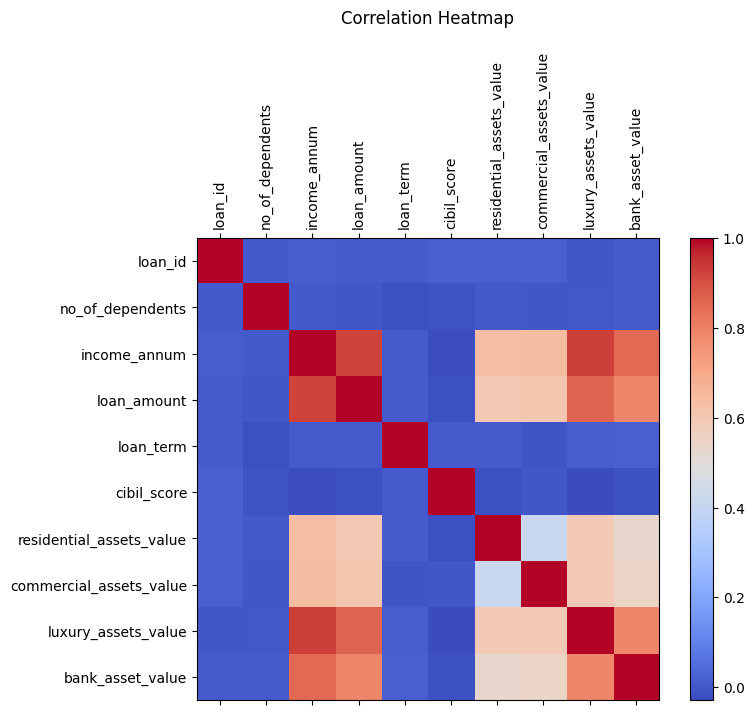

In [ ]:
corr = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Heatmap", pad=20)
plt.show()

Data Cleaning

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4264,False
4265,False
4266,False
4267,False


In [ ]:
## data cleaning
# handling missing values - done
# converting categorical variables - done
# addressing outliers - done
# removing duplicates and irrelavant data - done
# standardizing and correcting structural errors
# feature scaling (normalizion and standardization)

In [ ]:
# Handling Missing Values
round((data.isnull().sum()/data.shape[0])*100,2)

,0
loan_id,0.0
no_of_dependents,0.0
education,0.0
self_employed,0.0
income_annum,0.0
loan_amount,0.0
loan_term,0.0
cibil_score,0.0
residential_assets_value,0.0
commercial_assets_value,0.0


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Keep only rows within bounds
  data2 = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  print(data2.shape)

(4269, 13)
(4269, 13)
(4269, 13)
(4269, 13)
(4269, 13)
(4269, 13)
(4217, 13)
(4232, 13)
(4269, 13)
(4264, 13)


In [ ]:
# Fill categorical missing with mode (most frequent)
for col in ["education", "self_employed", "loan_status"]:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill numeric missing with median
for col in ["loan_id", "no_of_dependents", "income_annum", "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]:
    data[col].fillna(data[col].median(), inplace=True)


/tmp/ipython-input-1548544929.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-1548544929.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# Converting Categorical Variables
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['education', 'self_employed', 'loan_status']
Numerical columns : ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [ ]:
data[cat_col].nunique()

,0
education,2
self_employed,2
loan_status,2


In [ ]:
for col in data[cat_col].columns:
        unique_vals = data[col].unique()
        n_unique = len(unique_vals)

        # Case 1: Binary categorical
        if n_unique == 2:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

        # Case 2: Other categorical → One-Hot Encoding
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=False)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
# Numeric: impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
# Split features and target
X = data.drop("loan_status", axis=1)
Y = data["loan_status"]

# Convert target to binary (Y/N → 1/0)
Y = Y.map({"Y": 1, "N": 0})

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)

Categorical: []
Numeric: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [ ]:
# ===== Missing Values + Categorical Encoding (pandas + scikit-learn) =====

# 1) Load data
df = pd.read_csv("loan_approval_dataset.csv")

# Typical target column name in this dataset:
#   - "Loan_Status" (Y/N) → keep as-is for now; you’ll encode later when training a classifier
TARGET = "loan_status"
assert TARGET in df.columns, f"Couldn't find target column '{TARGET}' in {list(df.columns)}"

# 2) Drop rows with missing target (safe practice)
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# 3) Split features / target
X = df.drop(columns=[TARGET])
y = df[TARGET]

# 4) Identify column types
#    (object/category → categorical; the rest → numeric)
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns    :", num_cols)

# 5) Preprocessing
#    - Numeric: median impute
#    - Categorical: most-frequent impute + one-hot encode
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # dense matrix for convenience
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols),
    ],
    remainder="drop",  # keep only specified columns
    verbose_feature_names_out=False,
)

# 6) Train/test split BEFORE fitting the preprocessors (to avoid leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7) Fit on train, transform train and test
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc  = preprocess.transform(X_test)

# 8) Get the resulting feature names (for inspection/feature importance later)
feature_names = preprocess.get_feature_names_out()

print("\nProcessed shapes:")
print("X_train_proc:", X_train_proc.shape)
print("X_test_proc :", X_test_proc.shape)

print("\nFirst 10 processed feature names:")
print(feature_names[:10])

# ---- OPTIONAL: Wrap preprocessing + model into a single Pipeline later ----
# from sklearn.linear_model import LogisticRegression
# model = Pipeline([
#     ("prep", preprocess),
#     ("clf", LogisticRegression(max_iter=1000))
# ])
# model.fit(X_train, y_train)


Categorical columns: ['education', 'self_employed']
Numeric columns    : ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Processed shapes:
X_train_proc: (3415, 14)
X_test_proc : (854, 14)

First 10 processed feature names:
['loan_id' 'no_of_dependents' 'income_annum' 'loan_amount' 'loan_term'
 'cibil_score' 'residential_assets_value' 'commercial_assets_value'
 'luxury_assets_value' 'bank_asset_value']


In [ ]:
# ===== Classification with Imbalanced Data =====

# 1) Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"  # Kaggle dataset target is typically "Y"/"N"
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Identify categorical and numeric features
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns    :", num_cols)

# 3) Preprocessing
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Train/test split (stratify to preserve imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Model: Logistic Regression with class_weight="balanced"
clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",   # handles imbalance by upweighting minority class
        solver="liblinear"         # works well with small/medium datasets
    ))
])

# 6) Train
clf.fit(X_train, y_train)

# 7) Predict
y_pred = clf.predict(X_test)

# 8) Evaluate
print("\n=== Loan Approval Prediction Results ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=[f"True_{c}" for c in clf.classes_],
                        columns=[f"Pred_{c}" for c in clf.classes_])
print("\nConfusion Matrix:")
print(cm_df)


Categorical columns: ['education', 'self_employed']
Numeric columns    : ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

=== Loan Approval Prediction Results ===
Accuracy: 0.7494

Classification Report:
              precision    recall  f1-score   support

    Approved     0.7776    0.8362    0.8058       531
    Rejected     0.6926    0.6068    0.6469       323

    accuracy                         0.7494       854
   macro avg     0.7351    0.7215    0.7263       854
weighted avg     0.7454    0.7494    0.7457       854


Confusion Matrix:
                Pred_ Approved  Pred_ Rejected
True_ Approved             444              87
True_ Rejected             127             196


In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
# ===== Loan Approval — Handle Imbalance with Oversampling =====

# 1) Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"  # typically "Y"/"N"
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Identify categorical and numeric features
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# 3) Preprocessing
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Train/test split (before balancing to evaluate fairly)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Oversample minority class in TRAIN set
train_df = pd.concat([X_train, y_train], axis=1)

# Find class counts
class_counts = train_df[TARGET].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

n_majority = class_counts.max()
minority_df = train_df[train_df[TARGET] == minority_class]
majority_df = train_df[train_df[TARGET] == majority_class]

# Random oversampling of minority class
minority_oversampled = minority_df.sample(n=n_majority, replace=True, random_state=42)

# Combine back
train_balanced = pd.concat([majority_df, minority_oversampled]).sample(frac=1, random_state=42)
X_train_bal = train_balanced.drop(columns=[TARGET])
y_train_bal = train_balanced[TARGET]

print("Class distribution before balancing:\n", class_counts)
print("\nClass distribution after balancing:\n", y_train_bal.value_counts())

# 6) Logistic Regression (no need for class_weight since we balanced manually)
clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, solver="liblinear"))
])

# 7) Train
clf.fit(X_train_bal, y_train_bal)

# 8) Evaluate on untouched TEST set
y_pred = clf.predict(X_test)

print("\n=== Loan Approval Prediction with Oversampling ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=[f"True_{c}" for c in clf.classes_],
                        columns=[f"Pred_{c}" for c in clf.classes_])
print("\nConfusion Matrix:")
print(cm_df)


Class distribution before balancing:
 loan_status
Approved    2125
Rejected    1290
Name: count, dtype: int64

Class distribution after balancing:
 loan_status
Approved    2125
Rejected    2125
Name: count, dtype: int64

=== Loan Approval Prediction with Oversampling ===
Accuracy: 0.7518

Classification Report:
              precision    recall  f1-score   support

    Approved     0.7803    0.8362    0.8073       531
    Rejected     0.6947    0.6130    0.6513       323

    accuracy                         0.7518       854
   macro avg     0.7375    0.7246    0.7293       854
weighted avg     0.7479    0.7518    0.7483       854


Confusion Matrix:
                Pred_ Approved  Pred_ Rejected
True_ Approved             444              87
True_ Rejected             125             198


In [ ]:
# ===== Logistic Regression vs Decision Tree =====

# 1) Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"  # typically "Y"/"N"
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Identify categorical and numeric features
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# 3) Preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Train/test split (stratify preserves imbalance ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5a) Logistic Regression (balanced for class imbalance)
logreg = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(
        max_iter=1000, solver="liblinear", class_weight="balanced"
    ))
])

# 5b) Decision Tree
dtree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=5,       # prevent overfitting
        class_weight="balanced",  # handle imbalance
        random_state=42
    ))
])

# 6) Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)

# 7) Predictions
y_pred_lr = logreg.predict(X_test)
y_pred_dt = dtree.predict(X_test)

# 8) Evaluate Logistic Regression
print("\n=== Logistic Regression ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr, digits=4))
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
print("\nConfusion Matrix (LogReg):")
print(pd.DataFrame(cm_lr, index=[f"True_{c}" for c in logreg.classes_],
                             columns=[f"Pred_{c}" for c in logreg.classes_]))

# 9) Evaluate Decision Tree
print("\n=== Decision Tree ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, digits=4))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dtree.classes_)
print("\nConfusion Matrix (Decision Tree):")
print(pd.DataFrame(cm_dt, index=[f"True_{c}" for c in dtree.classes_],
                             columns=[f"Pred_{c}" for c in dtree.classes_]))



=== Logistic Regression ===
Accuracy: 0.7494
              precision    recall  f1-score   support

    Approved     0.7776    0.8362    0.8058       531
    Rejected     0.6926    0.6068    0.6469       323

    accuracy                         0.7494       854
   macro avg     0.7351    0.7215    0.7263       854
weighted avg     0.7454    0.7494    0.7457       854


Confusion Matrix (LogReg):
                Pred_ Approved  Pred_ Rejected
True_ Approved             444              87
True_ Rejected             127             196

=== Decision Tree ===
Accuracy: 0.9778
              precision    recall  f1-score   support

    Approved     0.9942    0.9699    0.9819       531
    Rejected     0.9524    0.9907    0.9712       323

    accuracy                         0.9778       854
   macro avg     0.9733    0.9803    0.9765       854
weighted avg     0.9784    0.9778    0.9778       854


Confusion Matrix (Decision Tree):
                Pred_ Approved  Pred_ Rejected
True_ App

In [41]:
# ===== Logistic Regression vs Decision Tree on BALANCED (oversampled) data =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

# 1) Load
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"  # e.g., "Approved"/"Rejected" or "Y"/"N" (may contain spaces!)
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# --- Clean & normalize labels ---
y_raw = df[TARGET].astype(str).str.strip()
y = (
    y_raw.replace({
        "Y":"Approved","N":"Rejected",
        "y":"Approved","n":"Rejected",
        "APPROVED":"Approved","REJECTED":"Rejected",
        "approved":"Approved","rejected":"Rejected"
    })
)
X = df.drop(columns=[TARGET])

# 2) Column sets
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# 3) Preprocessing
numeric_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median"))])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])
preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Split (keep test untouched)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Random oversampling (training set only)
train_df = pd.concat([X_train, y_train.rename(TARGET)], axis=1)
counts = train_df[TARGET].value_counts()
maj = counts.idxmax(); minr = counts.idxmin()
n_majority = counts.max()

minority_df = train_df[train_df[TARGET] == minr]
majority_df = train_df[train_df[TARGET] == maj]
minority_oversampled = minority_df.sample(n=n_majority, replace=True, random_state=42)

train_bal = pd.concat([majority_df, minority_oversampled]).sample(frac=1, random_state=42)
X_train_bal = train_bal.drop(columns=[TARGET])
y_train_bal = train_bal[TARGET]

print("Class distribution BEFORE balancing:\n", y_train.value_counts())
print("\nClass distribution AFTER  balancing:\n", y_train_bal.value_counts())

# 6) Models (no class_weight needed; we already balanced)
logreg = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, solver="liblinear"))
])
dtree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# 7) Train on balanced, evaluate on original test
logreg.fit(X_train_bal, y_train_bal)
dtree.fit(X_train_bal, y_train_bal)

y_pred_lr = logreg.predict(X_test)
y_pred_dt = dtree.predict(X_test)

# 8) Reports
print("\n=== Logistic Regression (balanced train) ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr, digits=4))
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
print("Confusion Matrix (LogReg):")
print(pd.DataFrame(cm_lr, index=[f"True_{c}" for c in logreg.classes_],
                             columns=[f"Pred_{c}" for c in logreg.classes_]))

print("\n=== Decision Tree (balanced train) ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, digits=4))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dtree.classes_)
print("Confusion Matrix (Decision Tree):")
print(pd.DataFrame(cm_dt, index=[f"True_{c}" for c in dtree.classes_],
                             columns=[f"Pred_{c}" for c in dtree.classes_]))

# 9) Side-by-side summary
if y_test.nunique() == 2:
    POS_LABEL = "Approved" if "Approved" in set(y_test.unique()) else sorted(set(y_test.unique()))[-1]
    prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(
        y_test, y_pred_lr, average="binary", pos_label=POS_LABEL, zero_division=0
    )
    prec_dt, rec_dt, f1_dt, _ = precision_recall_fscore_support(
        y_test, y_pred_dt, average="binary", pos_label=POS_LABEL, zero_division=0
    )
    avg_desc = f'binary (pos_label="{POS_LABEL}")'
else:
    prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(
        y_test, y_pred_lr, average="macro", zero_division=0
    )
    prec_dt, rec_dt, f1_dt, _ = precision_recall_fscore_support(
        y_test, y_pred_dt, average="macro", zero_division=0
    )
    avg_desc = "macro"

print(f"\n=== Side-by-side summary (average={avg_desc}) ===")
print(f"LogReg : Acc={accuracy_score(y_test, y_pred_lr):.4f}, Precision={prec_lr:.4f}, Recall={rec_lr:.4f}, F1={f1_lr:.4f}")
print(f"DT     : Acc={accuracy_score(y_test, y_pred_dt):.4f}, Precision={prec_dt:.4f}, Recall={rec_dt:.4f}, F1={f1_dt:.4f}")


Class distribution BEFORE balancing:
 loan_status
Approved    2125
Rejected    1290
Name: count, dtype: int64

Class distribution AFTER  balancing:
 loan_status
Approved    2125
Rejected    2125
Name: count, dtype: int64

=== Logistic Regression (balanced train) ===
Accuracy: 0.7518
              precision    recall  f1-score   support

    Approved     0.7803    0.8362    0.8073       531
    Rejected     0.6947    0.6130    0.6513       323

    accuracy                         0.7518       854
   macro avg     0.7375    0.7246    0.7293       854
weighted avg     0.7479    0.7518    0.7483       854

Confusion Matrix (LogReg):
               Pred_Approved  Pred_Rejected
True_Approved            444             87
True_Rejected            125            198

=== Decision Tree (balanced train) ===
Accuracy: 0.9789
              precision    recall  f1-score   support

    Approved     0.9961    0.9699    0.9828       531
    Rejected     0.9525    0.9938    0.9727       323

    accur

In [ ]:
# ===== Using SMOTE to Fix Class Imbalance =====

# SMOTE comes from imbalanced-learn
from imblearn.over_sampling import SMOTE

# 1) Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"  # typically "Y"/"N"
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Identify categorical and numeric features
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# 3) Preprocessing
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Train/test split (before SMOTE — test set remains untouched)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Preprocess TRAIN set only
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc  = preprocess.transform(X_test)

# 6) Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_proc, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_bal).value_counts())

# 7a) Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver="liblinear")
logreg.fit(X_train_bal, y_train_bal)
y_pred_lr = logreg.predict(X_test_proc)

print("\n=== Logistic Regression with SMOTE ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr, digits=4))
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
print("\nConfusion Matrix (LogReg):")
print(pd.DataFrame(cm_lr, index=[f"True_{c}" for c in logreg.classes_],
                             columns=[f"Pred_{c}" for c in logreg.classes_]))

# 7b) Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_bal, y_train_bal)
y_pred_dt = dtree.predict(X_test_proc)

print("\n=== Decision Tree with SMOTE ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, digits=4))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dtree.classes_)
print("\nConfusion Matrix (Decision Tree):")
print(pd.DataFrame(cm_dt, index=[f"True_{c}" for c in dtree.classes_],
                             columns=[f"Pred_{c}" for c in dtree.classes_]))


Class distribution before SMOTE:
 loan_status
Approved    2125
Rejected    1290
Name: count, dtype: int64

Class distribution after SMOTE:
 loan_status
Rejected    2125
Approved    2125
Name: count, dtype: int64

=== Logistic Regression with SMOTE ===
Accuracy: 0.7471
              precision    recall  f1-score   support

    Approved     0.7768    0.8324    0.8036       531
    Rejected     0.6877    0.6068    0.6447       323

    accuracy                         0.7471       854
   macro avg     0.7323    0.7196    0.7242       854
weighted avg     0.7431    0.7471    0.7435       854


Confusion Matrix (LogReg):
                Pred_ Approved  Pred_ Rejected
True_ Approved             442              89
True_ Rejected             127             196

=== Decision Tree with SMOTE ===
Accuracy: 0.9789
              precision    recall  f1-score   support

    Approved     0.9961    0.9699    0.9828       531
    Rejected     0.9525    0.9938    0.9727       323

    accuracy        

In [ ]:
# ===== Logistic Regression vs Decision Tree =====

# 1) Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"  # target column (typically "Y"/"N")
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# 3) Preprocessing
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5a) Logistic Regression (handle imbalance with class_weight)
logreg = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced"))
])

# 5b) Decision Tree (handle imbalance with class_weight)
dtree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42))
])

# 6) Train both models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)

# 7) Predictions
y_pred_lr = logreg.predict(X_test)
y_pred_dt = dtree.predict(X_test)

# 8) Evaluate Logistic Regression
print("\n=== Logistic Regression ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr, digits=4))
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
print("\nConfusion Matrix (LogReg):")
print(pd.DataFrame(cm_lr, index=[f"True_{c}" for c in logreg.classes_],
                             columns=[f"Pred_{c}" for c in logreg.classes_]))

# 9) Evaluate Decision Tree
print("\n=== Decision Tree ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, digits=4))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dtree.classes_)
print("\nConfusion Matrix (Decision Tree):")
print(pd.DataFrame(cm_dt, index=[f"True_{c}" for c in dtree.classes_],
                             columns=[f"Pred_{c}" for c in dtree.classes_]))



=== Logistic Regression ===
Accuracy: 0.7494
              precision    recall  f1-score   support

    Approved     0.7776    0.8362    0.8058       531
    Rejected     0.6926    0.6068    0.6469       323

    accuracy                         0.7494       854
   macro avg     0.7351    0.7215    0.7263       854
weighted avg     0.7454    0.7494    0.7457       854


Confusion Matrix (LogReg):
                Pred_ Approved  Pred_ Rejected
True_ Approved             444              87
True_ Rejected             127             196

=== Decision Tree ===
Accuracy: 0.9778
              precision    recall  f1-score   support

    Approved     0.9942    0.9699    0.9819       531
    Rejected     0.9524    0.9907    0.9712       323

    accuracy                         0.9778       854
   macro avg     0.9733    0.9803    0.9765       854
weighted avg     0.9784    0.9778    0.9778       854


Confusion Matrix (Decision Tree):
                Pred_ Approved  Pred_ Rejected
True_ App

In [39]:
# ===== Logistic Regression vs Decision Tree (with SMOTE) =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1) Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

TARGET = "loan_status"
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# 3) Preprocessing
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
])

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Preprocess TRAIN/TEST
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc  = preprocess.transform(X_test)

# 6) Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_proc, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_bal).value_counts())

# 7a) Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver="liblinear")
logreg.fit(X_train_bal, y_train_bal)
y_pred_lr = logreg.predict(X_test_proc)

print("\n=== Logistic Regression (SMOTE) ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr, digits=4))
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
print("\nConfusion Matrix (LogReg):")
print(pd.DataFrame(cm_lr, index=[f"True_{c}" for c in logreg.classes_],
                             columns=[f"Pred_{c}" for c in logreg.classes_]))

# 7b) Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_bal, y_train_bal)
y_pred_dt = dtree.predict(X_test_proc)

print("\n=== Decision Tree (SMOTE) ===")
print("Accuracy:", f"{accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, digits=4))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dtree.classes_)
print("\nConfusion Matrix (Decision Tree):")
print(pd.DataFrame(cm_dt, index=[f"True_{c}" for c in dtree.classes_],
                             columns=[f"Pred_{c}" for c in dtree.classes_]))


Class distribution before SMOTE:
 loan_status
Approved    2125
Rejected    1290
Name: count, dtype: int64

Class distribution after SMOTE:
 loan_status
Rejected    2125
Approved    2125
Name: count, dtype: int64

=== Logistic Regression (SMOTE) ===
Accuracy: 0.7471
              precision    recall  f1-score   support

    Approved     0.7768    0.8324    0.8036       531
    Rejected     0.6877    0.6068    0.6447       323

    accuracy                         0.7471       854
   macro avg     0.7323    0.7196    0.7242       854
weighted avg     0.7431    0.7471    0.7435       854


Confusion Matrix (LogReg):
                Pred_ Approved  Pred_ Rejected
True_ Approved             442              89
True_ Rejected             127             196

=== Decision Tree (SMOTE) ===
Accuracy: 0.9789
              precision    recall  f1-score   support

    Approved     0.9961    0.9699    0.9828       531
    Rejected     0.9525    0.9938    0.9727       323

    accuracy              